In [11]:
import matplotlib.pyplot as plt
import phoebe as pb
from phoebe import u
import pandas as pd 

In [2]:
logger = pb.logger()
b = pb.default_binary()

In [3]:
df = pd.read_csv("./TIC_465088681_sec12.csv", sep="\t")
# df = pd.read_csv("./TIC_465088681_200.csv", sep="\t")
watts_units = u.W / (u.m * u.m)
flux =df['flux']
time = df['time']
sigma = df['flux_err']

In [4]:
### adding lightcurve dataset
b.add_dataset('lc', fluxes=flux.values*watts_units, times=time.values*u.day, sigmas = sigma.values*watts_units, overwrite=True)

<ParameterSet: 80 parameters | contexts: compute, constraint, dataset, figure>

In [5]:
print(b['ldatm'])
# print(b.get_parameter('ldatm'))
print(b['mass'])

ParameterSet: 0 parameters
NO PARAMETERS
ParameterSet: 4 parameters
C          mass@primary@component: 0.9988131358058301 solMass
C        mass@secondary@component: 0.9988131358058301 solMass
          mass@primary@constraint: (39.478418 * ({sma@binary@component} ** 3.000000)) / ((({period@binary@component} ** 2.000000) * ({q@binary@component} + 1.000000)) * 2942.206217504419328179210424423218)
        mass@secondary@constraint: (39.478418 * ({sma@binary@component} ** 3.000000)) / ((({period@binary@component} ** 2.000000) * ((1.000000 / {q@binary@component}) + 1.000000)) * 2942.206217504419328179210424423218)


In [6]:
b["sma@binary"] = 65.5 * u.solRad

In [7]:
print(b["sma@binary"])

Parameter: sma@binary@component
                       Qualifier: sma
                     Description: Semi-major axis of the orbit (defined at time t0@system)
                           Value: 65.5 solRad
                  Constrained by: 
                      Constrains: asini@binary@component, requivratio@binary@component, requivsumfrac@binary@component, mass@primary@component, sma@primary@component, asini@primary@component, requiv_max@primary@component, mass@secondary@component, sma@secondary@component, asini@secondary@component, requiv_max@secondary@component
                      Related to: incl@binary@component, asini@binary@component, requiv@secondary@component, requiv@primary@component, requivratio@binary@component, requivsumfrac@binary@component, period@binary@component, q@binary@component, mass@primary@component, sma@primary@component, asini@primary@component, syncpar@primary@component, ecc@binary@component, incl@primary@component, long_an@primary@component, long_an@binar

In [8]:
#system 
b["ecc@binary"] = 0.26
b["q@binary"] = 5.77
b["sma@binary"] = 65.5 * u.solRad
b["incl@binary"] = 79.5
b["per0"] = 311 *u.deg
b["period@binary"] = 5.952 *u.day
b["vgamma@system"] = 0.0016465

#primary
b.flip_constraint("mass@primary", solve_for="sma")
b["mass@primary@component"] = 10.4
# b.flip_constraint("sma@binary", solve_for="mass")
b["requiv@primary"] = 12
b["teff@primary"] = 25000
b["gravb_bol@primary"] = 1.0
b["irrad_frac_refl_bol@primary"] = 1.0
b.flip_constraint("logg@primary", solve_for="requiv@primary")
b["logg@primary@star@component"] = 3.8
# b.flip_constraint("requiv@primary",solve_for="logg@primary")

#secondary
## really i shouldnt need to set the secondary mass w q
b.flip_constraint("mass@secondary", solve_for="q")
b["mass@secondary@component"] = 1.8
# b.flip_constraint("q@binary", solve_for="mass")
b["requiv@secondary@component"] = 2.2
b["teff@secondary@component"] = 7000
b["gravb_bol@secondary"] = 1.0
b["irrad_frac_refl_bol@secondary"] = 1.0

#atmosphere
b.set_value_all("ld_mode", "manual")
b.set_value_all("ld_mode_bol", "manual")
b.set_value_all("atm", "ck2004")
b.set_value('pblum_mode', 'dataset-scaled')
# b.set_value('pblum_mode', 'component-coupled')

b.flip_constraint("esinw@binary@orbit", solve_for='ecc')
b.flip_constraint("ecosw@binary@orbit", solve_for='per0')
b.flip_constraint("teffratio@binary@orbit", solve_for='teff@primary')
b.flip_constraint("requivsumfrac@binary@orbit", solve_for='requiv@secondary')

<ConstraintParameter: {requiv@secondary@component} = ({requivsumfrac@binary@component} * {sma@binary@component}) - {requiv@primary@component} (solar units) => 2.2 solRad>

100%|████████████████████████████████████████████████████████████████████████████████████| 554/554 [00:14<00:00, 37.08it/s]


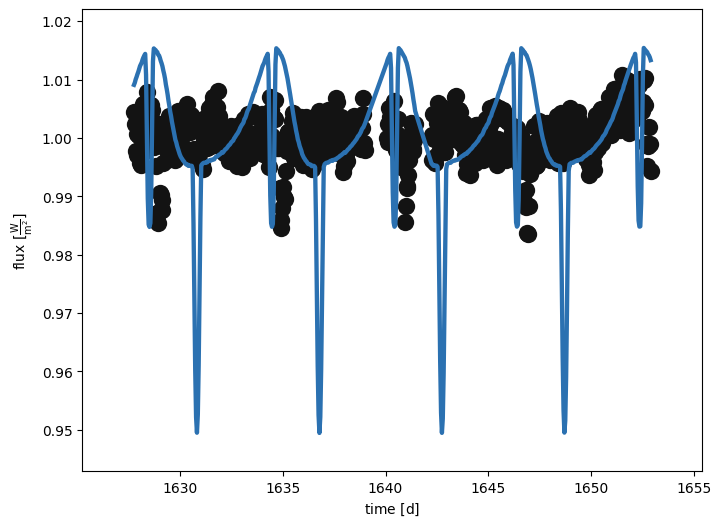

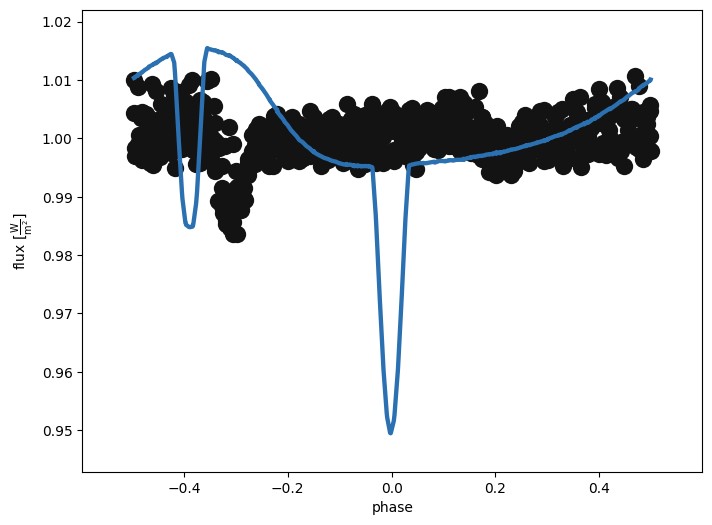

(<autofig.figure.Figure | 1 axes | 2 call(s)>,
 <Figure size 800x600 with 1 Axes>)

In [9]:
b.run_compute()
b.plot(show=True)
b.plot(x='phase', show=True)
### blue is synthetic, black is data

In [10]:
b.add_solver('estimator.ebai', solver='ebaiest', ebai_method = 'mlp', overwrite=True)
b['phase_bin@ebaiest@solver'] = False
b.run_solver(solver='ebaiest', solution= "ebaiest_sol",kind='ebai', overwrite=True)
print(b.adopt_solution('ebaiest_sol'))
b.adopt_solution('ebaiest_sol')

ParameterSet: 23 parameters
      t0_supconj@binary@component: -1.7763863324729936 d
       teffratio@binary@component: 0.8086927523169218
   requivsumfrac@binary@component: 0.2224029534607088
           esinw@binary@component: -0.006271457507820322
           ecosw@binary@component: 0.026039950957237323
            incl@binary@component: 77.52201146504346 deg
C     t0_perpass@binary@component: -3.4387056925965975 d
C         t0_ref@binary@component: -7.6788241400932655 d
C     compute_phases@lc01@dataset: []
C          teff@primary@component: 8655.945017368898 K
C    requivratio@binary@component: 0.05258314736143661
C      requiv@secondary@component: 0.3535062227030181 solRad
C            ecc@binary@component: 0.026784514651710993
C           per0@binary@component: 346.45877706633075 deg
C          asini@binary@component: 31.065962651902257 solRad
C         asini@primary@component: 4.583502686346235 solRad
C          incl@primary@component: 77.52201146504346 deg
C    requiv_max@primar

<ParameterSet: 6 parameters | qualifiers: t0_supconj, ecosw, esinw, requivsumfrac, incl, teffratio>

In [13]:
# b["requiv@secondary@component"] = 2.2
# b.flip_constraint('requiv@secondary', solve_for="requivsumfrac@binary@orbit")
b["incl@binary"] = 85
# b.flip_constraint("requiv@primary", solve_for="logg")
b["requiv@primary"] = 12 #12
b["teff@secondary@component"] = 7000 #6000
# b["teff@primary@component"] = 25000
b["irrad_frac_refl_bol@primary"] = 1.0
# b["sma@binary"] = 65.5 * u.solRad
b["incl@binary"] = 79.5 #80

In [15]:
print(b.filter('q'))
# print(b.get_parameter('q'))

ParameterSet: 2 parameters
C              q@binary@component: 0.17307692307692307
                     q@constraint: {mass@secondary@component} / {mass@primary@component}


In [16]:
b.run_compute()
b.plot(show=True)
b.plot(x='phase', show=True)

Thu, 03 Aug 2023 15:04 BUNDLE       WARNING overwriting model: latest
Thu, 03 Aug 2023 15:04 BUNDLE       WARNING constraints ['requiv@secondary@star@constraint'] failed to run.  Address errors and try again.  Call run_failed_constraints to see the tracebacks.  If not addressed, this warning will continue to be raised and will throw an error at run_compute.


ValueError: failed to pass checks
Run Checks Report: FAIL
ERROR: constraints ['requiv@secondary@star@constraint'] failed to run.  Address errors and try again.  Call run_failed_constraints to see the tracebacks. (1 affected parameters, affecting system,run_compute)

In [17]:
b.add_solver('optimizer.nelder_mead', solver='nm_solver')

<ParameterSet: 14 parameters | qualifiers: xatol, fit_parameters, compute, progress_every_niters, use_server, priors_combine, continue_from, adaptive, comments, priors, fatol, expose_lnprobabilities, maxiter, initial_values>

In [18]:
# print(b.filter(solver='nm_solver'))
b.add_compute('ellc', compute='fastcompute', overwrite=True)
b.set_value('compute', solver='nm_solver', value='fastcompute')
# b.set_value('compute', solver='nm_solver', value='phoebe01')
# ValueError: value for compute@nm_solver@solver must be one of ['phoebe01'], not 'fastcompute'
b.set_value('maxiter', 1000)
# b.set_value('maxfev', 1000)
# print(b.get_parameter('fit_parameters'))

In [12]:
b.set_value('fit_parameters', ['q', 'vgamma', 't0_supconj'])
b.get_value('fit_parameters', expand=True)

['q@binary@orbit@component',
 'vgamma@system',
 't0_supconj@binary@orbit@component']

In [13]:
print(b.filter(qualifier='enabled', compute='phoebe01'))
print(b.filter(qualifier='enabled', compute='fastcompute'))

ParameterSet: 1 parameters
         enabled@phoebe01@compute: True
ParameterSet: 1 parameters
      enabled@fastcompute@compute: True


In [14]:
b.run_solver('nm_solver', solution='nm_sol', overwrite=True)

  1%|▌                                                                                    | 7/1000 [00:04<08:56,  1.85it/s]Thu, 03 Aug 2023 14:32 BUNDLE       WARNING secondary is overflowing at periastron (requiv=2.2, requiv_max=2.051427219179008).  Use contact model if overflowing is desired.  If not addressed, this warning will continue to be raised and will throw an error at run_compute.
Thu, 03 Aug 2023 14:32 SOLVER       WARNING received error from run_compute: failed to pass checks
Run Checks Report: FAIL
ERROR: secondary is overflowing at periastron (requiv=2.2, requiv_max=2.051427219179008).  Use contact model if overflowing is desired. (4 affected parameters, affecting system,run_compute).  lnprobability=-inf
  1%|▋                                                                                    | 8/1000 [00:04<08:45,  1.89it/s]<string>:1: RuntimeWarning: divide by zero encountered in scalar divide
Thu, 03 Aug 2023 14:32 BUNDLE       ERROR   Constraint 'asini@primary@star@c

  2%|█▋                                                                                  | 20/1000 [00:09<07:46,  2.10it/s]Thu, 03 Aug 2023 14:33 BUNDLE       WARNING secondary is overflowing at periastron (requiv=2.2, requiv_max=2.024006741479266).  Use contact model if overflowing is desired.  If not addressed, this warning will continue to be raised and will throw an error at run_compute.
Thu, 03 Aug 2023 14:33 SOLVER       WARNING received error from run_compute: failed to pass checks
Run Checks Report: FAIL
ERROR: secondary is overflowing at periastron (requiv=2.2, requiv_max=2.024006741479266).  Use contact model if overflowing is desired. (4 affected parameters, affecting system,run_compute).  lnprobability=-inf
  2%|█▊                                                                                  | 21/1000 [00:10<07:57,  2.05it/s]Thu, 03 Aug 2023 14:33 BUNDLE       WARNING secondary is overflowing at periastron (requiv=2.2, requiv_max=2.1471330425266464).  Use contact model i

Thu, 03 Aug 2023 14:33 SOLVER       WARNING received error from run_compute: failed to pass checks
Run Checks Report: FAIL
ERROR: secondary is overflowing at periastron (requiv=2.2, requiv_max=2.193414423950352).  Use contact model if overflowing is desired. (4 affected parameters, affecting system,run_compute).  lnprobability=-inf
  3%|██▋                                                                                 | 32/1000 [00:16<08:32,  1.89it/s]Thu, 03 Aug 2023 14:33 BUNDLE       WARNING secondary is overflowing at periastron (requiv=2.2, requiv_max=2.1826467096955833).  Use contact model if overflowing is desired.  If not addressed, this warning will continue to be raised and will throw an error at run_compute.
Thu, 03 Aug 2023 14:33 SOLVER       WARNING received error from run_compute: failed to pass checks
Run Checks Report: FAIL
ERROR: secondary is overflowing at periastron (requiv=2.2, requiv_max=2.1826467096955833).  Use contact model if overflowing is desired. (4 affecte

  4%|███▌                                                                                | 43/1000 [00:21<08:26,  1.89it/s]Thu, 03 Aug 2023 14:33 BUNDLE       WARNING secondary is overflowing at periastron (requiv=2.2, requiv_max=2.1961430257361623).  Use contact model if overflowing is desired.  If not addressed, this warning will continue to be raised and will throw an error at run_compute.
Thu, 03 Aug 2023 14:33 SOLVER       WARNING received error from run_compute: failed to pass checks
Run Checks Report: FAIL
ERROR: secondary is overflowing at periastron (requiv=2.2, requiv_max=2.1961430257361623).  Use contact model if overflowing is desired. (4 affected parameters, affecting system,run_compute).  lnprobability=-inf
  4%|███▋                                                                                | 44/1000 [00:22<08:32,  1.87it/s]Thu, 03 Aug 2023 14:33 BUNDLE       WARNING secondary is overflowing at periastron (requiv=2.2, requiv_max=2.1991429707544907).  Use contact model

Thu, 03 Aug 2023 14:33 SOLVER       WARNING received error from run_compute: failed to pass checks
Run Checks Report: FAIL
ERROR: secondary is overflowing at periastron (requiv=2.2, requiv_max=2.1998996521814504).  Use contact model if overflowing is desired. (4 affected parameters, affecting system,run_compute).  lnprobability=-inf
  6%|████▌                                                                               | 55/1000 [00:28<08:27,  1.86it/s]Thu, 03 Aug 2023 14:33 BUNDLE       WARNING secondary is overflowing at periastron (requiv=2.2, requiv_max=2.199907888471108).  Use contact model if overflowing is desired.  If not addressed, this warning will continue to be raised and will throw an error at run_compute.
Thu, 03 Aug 2023 14:33 SOLVER       WARNING received error from run_compute: failed to pass checks
Run Checks Report: FAIL
ERROR: secondary is overflowing at periastron (requiv=2.2, requiv_max=2.199907888471108).  Use contact model if overflowing is desired. (4 affected

  7%|█████▋                                                                              | 67/1000 [00:34<08:25,  1.85it/s]Thu, 03 Aug 2023 14:33 BUNDLE       WARNING secondary is overflowing at periastron (requiv=2.2, requiv_max=2.199969060373741).  Use contact model if overflowing is desired.  If not addressed, this warning will continue to be raised and will throw an error at run_compute.
Thu, 03 Aug 2023 14:33 SOLVER       WARNING received error from run_compute: failed to pass checks
Run Checks Report: FAIL
ERROR: secondary is overflowing at periastron (requiv=2.2, requiv_max=2.199969060373741).  Use contact model if overflowing is desired. (4 affected parameters, affecting system,run_compute).  lnprobability=-inf
  7%|█████▋                                                                              | 68/1000 [00:35<08:19,  1.86it/s]Thu, 03 Aug 2023 14:33 BUNDLE       WARNING secondary is overflowing at periastron (requiv=2.2, requiv_max=2.1999736386540354).  Use contact model i

Thu, 03 Aug 2023 14:33 SOLVER       WARNING received error from run_compute: failed to pass checks
Run Checks Report: FAIL
ERROR: secondary is overflowing at periastron (requiv=2.2, requiv_max=2.199995695774442).  Use contact model if overflowing is desired. (4 affected parameters, affecting system,run_compute).  lnprobability=-inf
  8%|██████▋                                                                             | 79/1000 [00:40<08:02,  1.91it/s]Thu, 03 Aug 2023 14:33 BUNDLE       WARNING secondary is overflowing at periastron (requiv=2.2, requiv_max=2.1999987495715168).  Use contact model if overflowing is desired.  If not addressed, this warning will continue to be raised and will throw an error at run_compute.
Thu, 03 Aug 2023 14:33 SOLVER       WARNING received error from run_compute: failed to pass checks
Run Checks Report: FAIL
ERROR: secondary is overflowing at periastron (requiv=2.2, requiv_max=2.1999987495715168).  Use contact model if overflowing is desired. (4 affecte

  9%|███████▋                                                                            | 91/1000 [00:46<07:54,  1.92it/s]Thu, 03 Aug 2023 14:33 BUNDLE       WARNING secondary is overflowing at periastron (requiv=2.2, requiv_max=2.1999998373521725).  Use contact model if overflowing is desired.  If not addressed, this warning will continue to be raised and will throw an error at run_compute.
Thu, 03 Aug 2023 14:33 SOLVER       WARNING received error from run_compute: failed to pass checks
Run Checks Report: FAIL
ERROR: secondary is overflowing at periastron (requiv=2.2, requiv_max=2.1999998373521725).  Use contact model if overflowing is desired. (4 affected parameters, affecting system,run_compute).  lnprobability=-inf
  9%|███████▋                                                                            | 92/1000 [00:47<07:54,  1.91it/s]Thu, 03 Aug 2023 14:33 BUNDLE       WARNING secondary is overflowing at periastron (requiv=2.2, requiv_max=2.1999998714733566).  Use contact model

Thu, 03 Aug 2023 14:33 SOLVER       WARNING received error from run_compute: failed to pass checks
Run Checks Report: FAIL
ERROR: secondary is overflowing at periastron (requiv=2.2, requiv_max=2.199999992310721).  Use contact model if overflowing is desired. (4 affected parameters, affecting system,run_compute).  lnprobability=-inf
 11%|████████▊                                                                          | 106/1000 [00:54<07:17,  2.04it/s]Thu, 03 Aug 2023 14:33 BUNDLE       WARNING secondary is overflowing at periastron (requiv=2.2, requiv_max=2.199999975488853).  Use contact model if overflowing is desired.  If not addressed, this warning will continue to be raised and will throw an error at run_compute.
Thu, 03 Aug 2023 14:33 SOLVER       WARNING received error from run_compute: failed to pass checks
Run Checks Report: FAIL
ERROR: secondary is overflowing at periastron (requiv=2.2, requiv_max=2.199999975488853).  Use contact model if overflowing is desired. (4 affected 

 21%|█████████████████▍                                                                 | 210/1000 [01:53<07:03,  1.87it/s]Thu, 03 Aug 2023 14:34 BUNDLE       WARNING secondary is overflowing at periastron (requiv=2.2, requiv_max=2.199999995547114).  Use contact model if overflowing is desired.  If not addressed, this warning will continue to be raised and will throw an error at run_compute.
Thu, 03 Aug 2023 14:34 SOLVER       WARNING received error from run_compute: failed to pass checks
Run Checks Report: FAIL
ERROR: secondary is overflowing at periastron (requiv=2.2, requiv_max=2.199999995547114).  Use contact model if overflowing is desired. (4 affected parameters, affecting system,run_compute).  lnprobability=-inf
 21%|█████████████████▌                                                                 | 211/1000 [01:54<07:01,  1.87it/s]Thu, 03 Aug 2023 14:34 BUNDLE       WARNING secondary is overflowing at periastron (requiv=2.2, requiv_max=2.1999999964535526).  Use contact model i

Thu, 03 Aug 2023 14:34 SOLVER       WARNING received error from run_compute: failed to pass checks
Run Checks Report: FAIL
ERROR: secondary is overflowing at periastron (requiv=2.2, requiv_max=2.1999999997355904).  Use contact model if overflowing is desired. (4 affected parameters, affecting system,run_compute).  lnprobability=-inf
 22%|██████████████████▍                                                                | 222/1000 [02:00<06:52,  1.89it/s]Thu, 03 Aug 2023 14:34 BUNDLE       WARNING secondary is overflowing at periastron (requiv=2.2, requiv_max=2.199999999694732).  Use contact model if overflowing is desired.  If not addressed, this warning will continue to be raised and will throw an error at run_compute.
Thu, 03 Aug 2023 14:34 SOLVER       WARNING received error from run_compute: failed to pass checks
Run Checks Report: FAIL
ERROR: secondary is overflowing at periastron (requiv=2.2, requiv_max=2.199999999694732).  Use contact model if overflowing is desired. (4 affected

 23%|███████████████████▎                                                               | 233/1000 [02:06<06:44,  1.90it/s]Thu, 03 Aug 2023 14:34 BUNDLE       WARNING secondary is overflowing at periastron (requiv=2.2, requiv_max=2.199999999951773).  Use contact model if overflowing is desired.  If not addressed, this warning will continue to be raised and will throw an error at run_compute.
Thu, 03 Aug 2023 14:34 SOLVER       WARNING received error from run_compute: failed to pass checks
Run Checks Report: FAIL
ERROR: secondary is overflowing at periastron (requiv=2.2, requiv_max=2.199999999951773).  Use contact model if overflowing is desired. (4 affected parameters, affecting system,run_compute).  lnprobability=-inf
 23%|███████████████████▍                                                               | 234/1000 [02:06<06:44,  1.89it/s]Thu, 03 Aug 2023 14:34 BUNDLE       WARNING secondary is overflowing at periastron (requiv=2.2, requiv_max=2.199999999992835).  Use contact model if

Thu, 03 Aug 2023 14:35 SOLVER       WARNING received error from run_compute: failed to pass checks
Run Checks Report: FAIL
ERROR: secondary is overflowing at periastron (requiv=2.2, requiv_max=2.1999999999984388).  Use contact model if overflowing is desired. (4 affected parameters, affecting system,run_compute).  lnprobability=-inf
 25%|████████████████████▍                                                              | 246/1000 [02:12<06:21,  1.98it/s]Thu, 03 Aug 2023 14:35 BUNDLE       WARNING secondary is overflowing at periastron (requiv=2.2, requiv_max=2.1999999999984388).  Use contact model if overflowing is desired.  If not addressed, this warning will continue to be raised and will throw an error at run_compute.
Thu, 03 Aug 2023 14:35 SOLVER       WARNING received error from run_compute: failed to pass checks
Run Checks Report: FAIL
ERROR: secondary is overflowing at periastron (requiv=2.2, requiv_max=2.1999999999984388).  Use contact model if overflowing is desired. (4 affect

<ParameterSet: 11 parameters | qualifiers: fitted_units, fitted_twigs, adopt_parameters, adopt_distributions, fitted_values, initial_values, niter, adopt_values, comments, message, success>

In [15]:
b.run_compute(compute='fastcompute', sample_from='nm_sol', model='nm_model', overwrite=True)
# b.run_compute(compute='fastcompute', model='after_nm')

Thu, 03 Aug 2023 14:36 BUNDLE       WARNING all distributions are delta, using sample_size=1 instead of sample_size=10
100%|██████████████████████████████████████████████████████████████████████████████████████| 10/10 [00:03<00:00,  2.86it/s]


<ParameterSet: 9 parameters | qualifiers: sampled_uniqueids, sample_mode, sampled_twigs, fluxes, comments, times, failed_samples, samples, flux_scale>

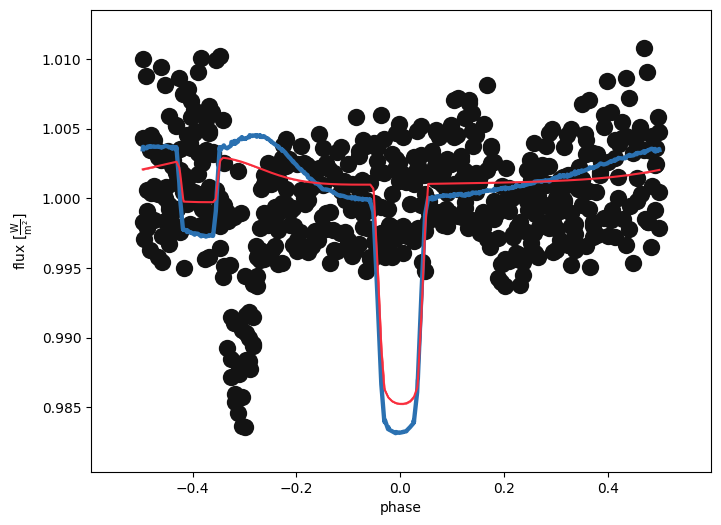

(<autofig.figure.Figure | 1 axes | 3 call(s)>,
 <Figure size 800x600 with 1 Axes>)

In [16]:
b.plot(x='phases', linestyle={'model': 'solid'},
           color={'nm_model': 'red', 'model_orig': 'green'},
           save='figure_optimizer_nm.pdf',
           show=True)
# b.plot(x='phases', 
#            c={'after_estimators': 'red', 'after_nm': 'green', 'dataset': 'black'}, 
#            linestyle={'after_estimators': 'dashed', 'after_nm': 'solid'},
#            marker={'dataset': '.'},
#            save='figure_optimizer_nm.pdf', show=True)

In [22]:
# print(b.filter(solution='nm_sol'))
print(b.adopt_solution(solution='nm_sol', trial_run=True))
b.adopt_solution(solution='nm_sol', trial_run=True)

ParameterSet: 3 parameters
         q@binary@orbit@component: 0.05890994276277393
                    vgamma@system: -0.0026424455028530133 km / s
   t0_supconj@binary@orbit@com...: -1.761648876060045 d


<ParameterSet: 3 parameters | contexts: component, system>

In [18]:
b.save('1.bundle')

'1.bundle'

In [20]:
b.add_solver('sampler.emcee',
             compute='fastcompute',
             solver='emcee_solver', overwrite=True)

<ParameterSet: 17 parameters | qualifiers: expose_failed, progress_every_niters, burnin_factor, thin_factor, init_from_combine, init_from, nwalkers, use_server, compute, continue_from, comments, init_from_requires, priors_combine, nlags_factor, continue_from_iter, niters, priors>

In [28]:
b.add_distribution({'teffratio': pb.gaussian_around(0.1),
                    'requivsumfrac': pb.gaussian_around(0.1),
                    'incl@binary': pb.gaussian_around(3),
                    'sma@binary': pb.gaussian_around(2),
                    'q': pb.gaussian_around(0.1)},
#                     'ecc': pb.gaussian_around(0.5),
#                     'per0': pb.gaussian_around(1)},
                    distribution='ball_around_optimized_solution', overwrite_all=True)

b.set_value('init_from', 'ball_around_optimized_solution') 

In [29]:
## priors

b.add_distribution({"ecc@binary": pb.gaussian(0.26, 0.01),
                    "q@binary": pb.gaussian(5.77, 0.1)},
                   distribution='priors_from_external_source', overwrite_all=True)


b.set_value('priors@emcee_solver', 'priors_from_external_source')

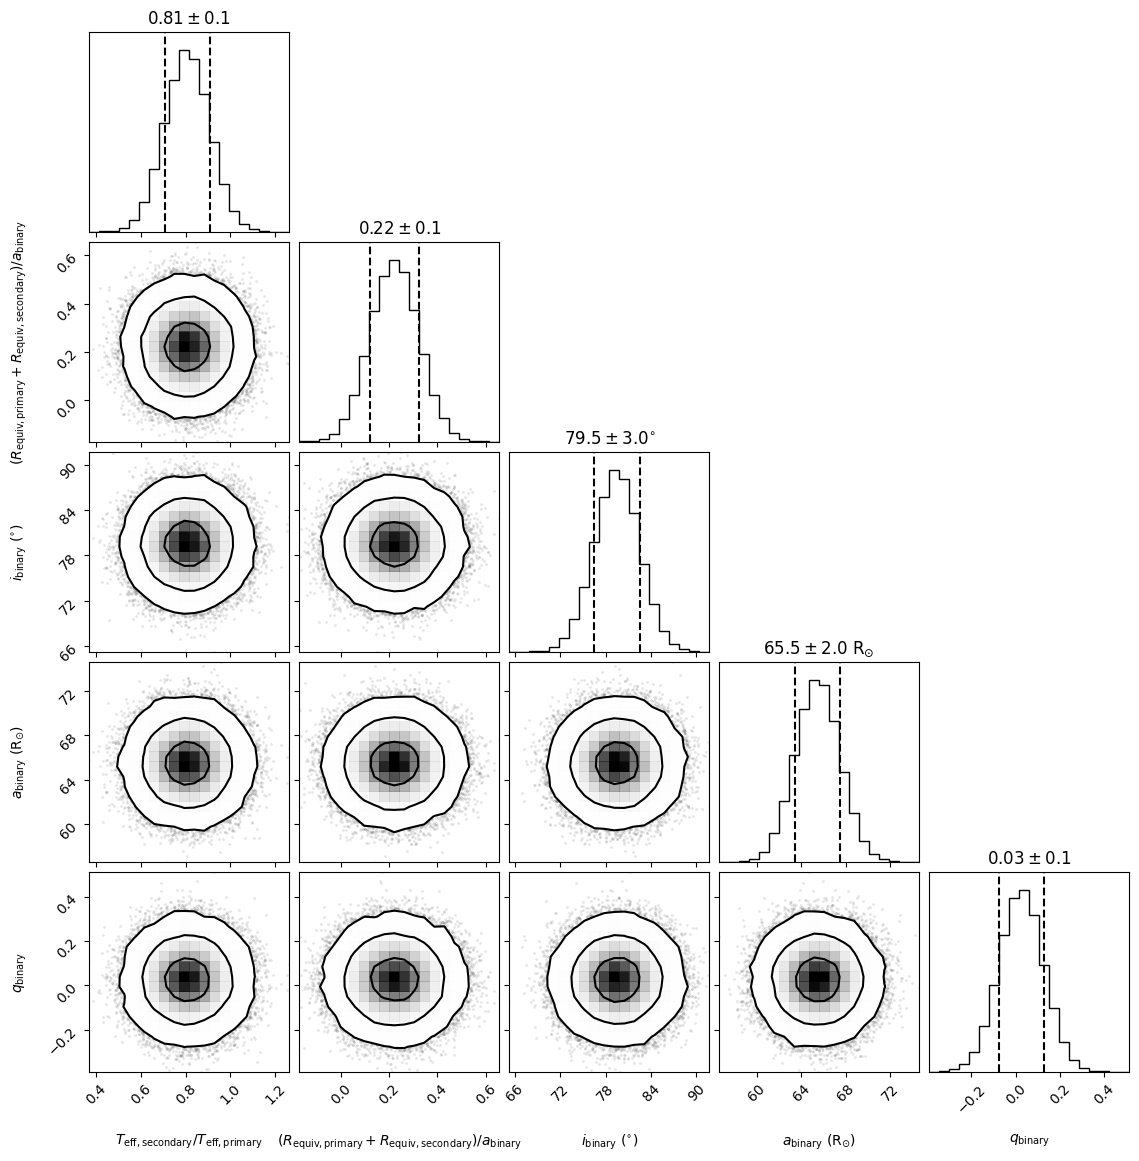

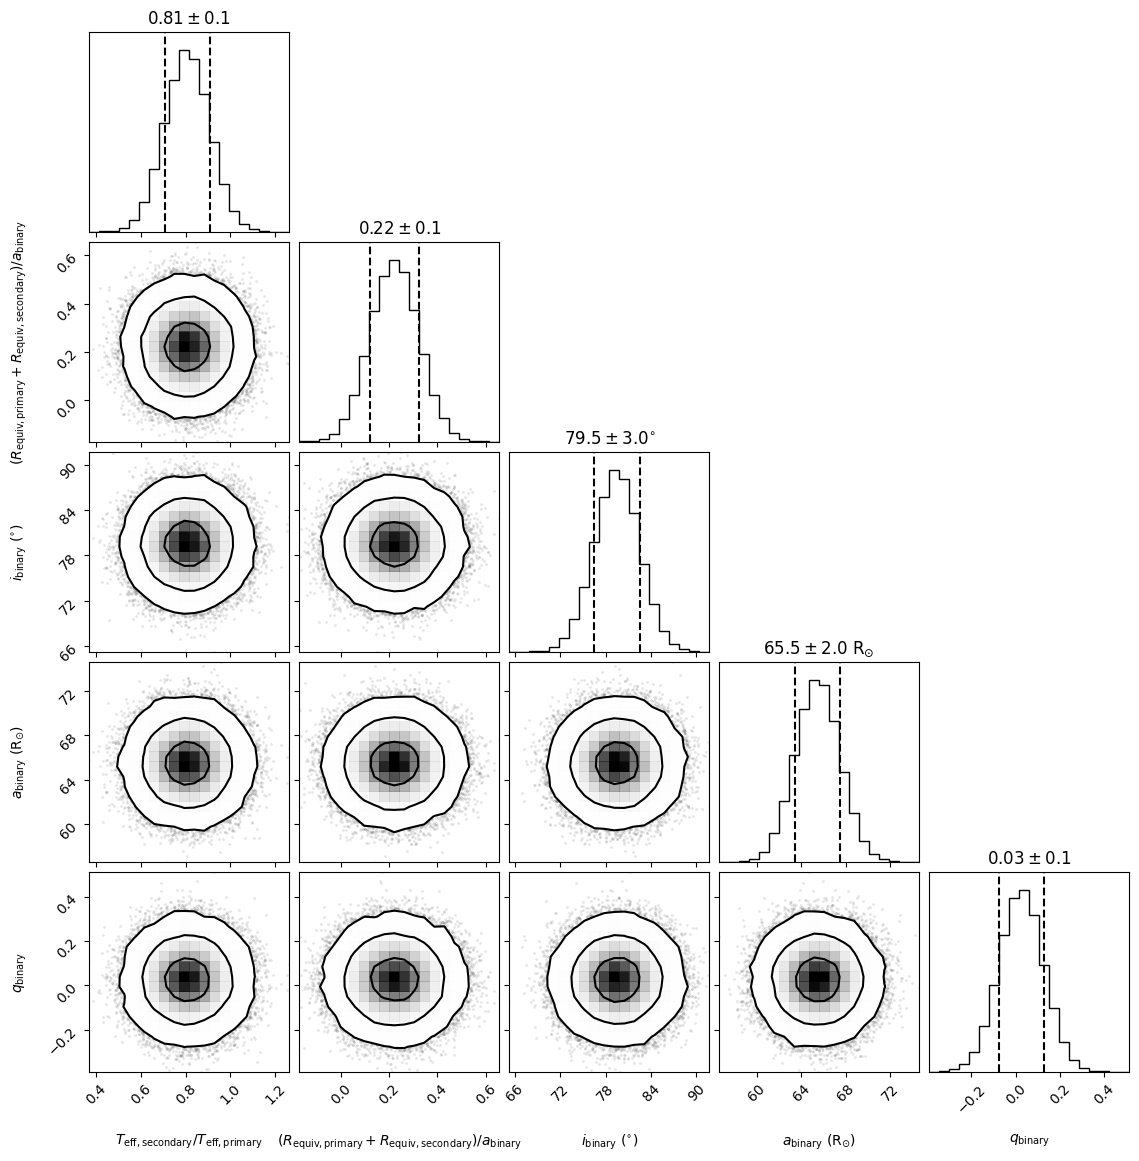

In [30]:
b.plot_distribution_collection('ball_around_optimized_solution', show=True)

In [31]:
b.run_compute(compute='fastcompute', sample_from='ball_around_optimized_solution', 
              sample_num=20, model='init_from_model', overwrite=True)

100%|██████████████████████████████████████████████████████████████████████████████████████| 20/20 [00:07<00:00,  2.52it/s]


<ParameterSet: 9 parameters | qualifiers: failed_samples, comments, sample_mode, sampled_twigs, fluxes, times, sampled_uniqueids, samples, flux_scale>

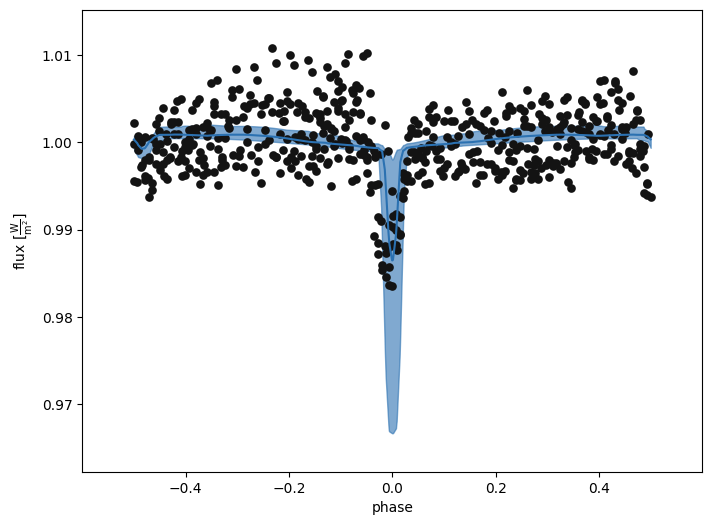

(<autofig.figure.Figure | 1 axes | 2 call(s)>,
 <Figure size 800x600 with 1 Axes>)

In [32]:
b.plot(dataset='lc01', x='phases', 
           marker={'dataset': '.'},
           model='init_from_model', show=True)

/Users/skbowes/anaconda3/lib/python3.10/site-packages/phoebe/dependencies/autofig/call.py:1305: UserWarning: You passed a edgecolor/edgecolors ('none') for an unfilled marker ('+').  Matplotlib is ignoring the edgecolor in favor of the facecolor.  This behavior may change in the future.
  artist = ax.scatter(*datapoint,


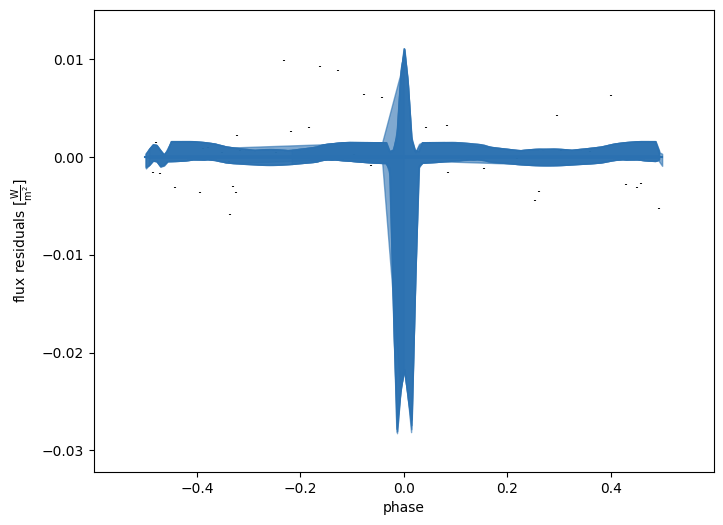

(<autofig.figure.Figure | 1 axes | 2 call(s)>,
 <Figure size 800x600 with 1 Axes>)

In [26]:
b.plot(dataset='lc01', x='phases', y='residuals',
           z={'dataset': 0, 'model': 1},
           model='init_from_model', show=True)

In [33]:
b.export_solver('initial_run_emcee.py',
                solver='emcee_solver',
                niters=1000, progress_every_niters=50,
                nwalkers=16,
                solution='emcee_sol',
                log_level='warning',
                pause=True)

Wed, 02 Aug 2023 15:11 BUNDLE       WARNING sampling with dataset-scaled can cause unintended issues.  Consider using component-coupled and marginalizing over pblum


* optional:  call b.save(...) to save the bundle to disk, you can then safely close the active python session and recover the bundle with phoebe.load(...)
* run inverse_run_emcee.py (within mpirun or on an external machine, if desired)
* once completed, copy inverse_run_emcee.py.out to this directory, if necessary
* press enter to exit this pause
* call b.import_solution('inverse_run_emcee.py.out')

(press enter to continue)


('inverse_run_emcee.py', 'inverse_run_emcee.py.out')

In [29]:
b.set_value('pblum', dataset='lc01', component='primary', value=pblums_scaled['pblum@primary@lc01'])
print(b.compute_pblums(compute='fastcompute', dataset='lc01', pbflux=True))

NameError: name 'pblums_scaled' is not defined

In [ ]:
b.add_dataset('orb', compute_times=time.values*u.day)
# b.add_dataset('orb', compute_times=np.linspace(-1,1,1001))
b.run_compute(ltte=False)

In [ ]:
print(b.get_parameter('fit_parameters'))

In [ ]:
afig, mplfig = b.plot(time='t0_supconj', show=True)

In [ ]:
print(b.filter('compute_phases'))

In [ ]:
afig, mplfig = b.plot(projection='3d', show=True)

In [ ]:
afig, mplfig = b.plot(x='times', show=True)
# u is a position on the sky

In [ ]:
print(b.get_parameter(qualifier='us', component='primary', kind='orb', context='model'))

In [ ]:
axs, artists = b.plot()

In [ ]:
b.add_dataset('mesh', include_times= 'lc01')

In [ ]:
b.set_value('compute_times', kind='mesh', value=[10])
b.set_value('include_times', kind='mesh', value=['lc01'])
b.set_value('columns', value=['teffs'])
b.run_compute()
# afig, mplfig = b.plot(kind='mesh', time=0.0, fc='teffs', ec='none', show=True)

In [ ]:
#will generate figure without time, but nothing gets plotted.
afig, mplfig = b.plot(kind='mesh', time=, fc='teffs', ec='none', show=True)

In [ ]:
afig, mplfig = b['lc01@model'].plot(x='phases', t0='t0_supconj', show=True)

In [ ]:
b.add_solver('optimizer.nelder_mead')
print(b.run_checks())
b.run_solver(kind='nelder_mead')
# print run checks, see which parameters are failing

In [ ]:
b.add_solver('estimator.ebai', solver='ebaiknn', ebai_method = 'knn', overwrite=True)
b['phase_bin@ebaiknn@solver'] = False
b.run_checks()
b.run_solver(solver='ebaiknn', solution= "ebaiknn_sol", kind='ebai', overwrite=True)
print(b.adopt_solution('ebaiknn_sol'))
b.adopt_solution('ebaiknn_sol')

In [ ]:
b.flip_constraint("ecc@binary@orbit", solve_for='esinw')
b.flip_constraint("per0@binary@orbit", solve_for='ecosw')

b.add_solver('estimator.lc_geometry', solver= 'lc_geo', overwrite=True)
# b['analytical_model@lc_geo'] = 'two-gaussian' ##this throws up an error, requires additional arguments
b['analytical_model@lc_geo'] = 'polyfit'
# print(b.get_solver(solver='lc_geo'))
print(b.run_checks())
b.run_solver(solver = 'lc_geo', solution = 'lc_geo_sol', kind='lc_geometry', overwrite=True)
b.adopt_solution('lc_geo_sol')

In [ ]:
b.add_solver('estimator.lc_periodogram', solver= 'lc_periodo', overwrite=True)
b.run_solver(solver= 'lc_periodo', solution = 'periodo_sol', kind='lc_periodogram', overwrite=True)
print(b.adopt_solution('periodo_sol'))
b.adopt_solution('periodo_sol')

b.run_compute()
b.plot(show=True)
b.plot(x='phase', show=True)

In [ ]:
# b.filter(component='primary', context='constraint')
print(b.filter(qualifier='atm'))
# b.set_value("logg@secondary@component", value = 3.4)
print(b.get_parameter('atm@primary@phoebe01@phoebe@compute'))
# print(b.get_parameter('q@binary@component'))

In [ ]:
""" set values """
# teff, requiv at prim or sec
# sma, period

b.set_value("teff@primary@component", value=25000)
# b.flip_constraint("teffratio@binary", solve_for = "teff@secondary")
# b.flip_constraint("teff@primary", solve_for = "teff@secondary")
b.set_value('ecc@binary@orbit@component', value=0.26)
b.set_value("teffratio@binary@component", value = 8.8)
# b.flip_constraint('teffratio@binary@component', solve_for='teff@primary')

# b.set_value("requiv@primary@component", value = 8.8)
# b.remove_constraint()
# b.set_value("teff@secondary@component", value=7000)

b.set_value("q@binary", value = 8.8)
b.set_value("sma@binary", value = 8.8)
b.set_value("per0@primary@component", value = 60)

### dont flip for teff ratio, try without flipping
 
# b.flip_constraint('requivsumfrac@binary@orbit', solve_for='sma')

""" we were here! try to get this running, with logg set (so it must be flipped)"""
b.flip_constraint('logg@primary', solve_for="requiv@primary") #its been flipped!
b.set_value("logg@primary@component", value = 3.8)

In [ ]:
print(b.filter(context='component'))
# mass @ binary, solve for q @ binary
#inclination , effective t, r equiv all have a big effect, so does sma

In [ ]:
### from the phoebe demos
b.set_value_all('ld_mode', 'manual')
b.set_value_all('ld_mode_bol', 'manual')
b.set_value_all('atm', 'blackbody')

b.flip_constraint('requivsumfrac', solve_for='requiv@secondary')
b.flip_constraint('teffratio@binary', solve_for='teff@secondary')
b.flip_constraint("esinw@binary@orbit", solve_for='ecc')
b.flip_constraint("ecosw@binary@orbit", solve_for='per0')

In [ ]:
### only works AFTER lc periodogram
b.add_solver('estimator.ebai', solver='ebaiest', ebai_method = 'mlp', overwrite=True)
b['phase_bin@ebaiest@solver'] = False
# print(b['ebaiest'])
#mlp
b.run_solver(solver='ebaiest', solution= "ebaiest_sol",kind='ebai', overwrite=True)

### flip back to default for lc estimator ?
# print(b['ebaiest'])

### adopt
b.adopt_solution('ebaiest_sol')

In [ ]:
#this one works!
b.add_solver('estimator.lc_periodogram', solver= 'lc_periodo', overwrite=True)
b.run_solver(solver= 'lc_periodo', solution = 'periodo_sol', kind='lc_periodogram', overwrite=True)
# print(b.get_solution('periodo_sol'))
b.adopt_solution('periodo_sol')

In [ ]:
print(b.get_solution('ebaiest_sol'))

In [ ]:
### add and run
# b.flip_constraint("ecc", solve_for='esinw@binary@orbit')
# b.flip_constraint("per0", solve_for='ecosw@binary@orbit')

b.set_value_all('ld_mode', 'lookup')
b.set_value_all('ld_mode_bol', 'lookup')
b['atm@secondary@compute'] = 'ck2004'
b['atm@primary@compute'] = 'ck2004'
b.set_value('pblum_mode', 'decoupled') #check the default is decoupled

b.add_solver('estimator.lc_geometry', solver= 'lc_geo', overwrite=True)
# b['analytical_model@lc_geo'] = 'two-gaussian' ##this throws up an error, requires additional arguments
b['analytical_model@lc_geo'] = 'polyfit'
print(b.get_parameter('requivsumfrac@binary@orbit@component'))
# print(b.get_solver(solver='lc_geo'))
print(b.run_checks())
b.run_solver(solver = 'lc_geo', solution = 'lc_geo_sol', kind='lc_geometry', overwrite=True)

### see if flipping should go here
# b.flip_constraint('requivsumfrac@binary@orbit', solve_for='sma') #its been flipped
# b.flip_constraint('requiv@primary@star', solve_for='logg') #its been flipped
#try mass flip q

#### adopt
b.adopt_solution('lc_geo_sol')

In [ ]:
b.run_compute()

In [ ]:
b.plot(show=True)
b.plot(x='phase', show=True)

In [ ]:
# b.flip_constraint("ecc", solve_for='esinw@binary@orbit')
# b.flip_constraint("per0", solve_for='ecosw@binary@orbit')

In [ ]:
print(b.filter(component='primary', context='component'))

In [ ]:
### treats sun as a blackbody
b.set_value_all('ld_mode', 'manual')
b.set_value_all('ld_mode_bol', 'manual')
b['atm@secondary@compute'] = 'blackbody'
b['atm@primary@compute'] = 'blackbody'
b.set_value('pblum_mode', 'dataset-scaled')

### resets
b.set_value_all('ld_mode', 'lookup')
b.set_value_all('ld_mode_bol', 'lookup')
b['atm@secondary@compute'] = 'ck2004'
b['atm@primary@compute'] = 'ck2004'
b.set_value('pblum_mode', 'decoupled') #check the default is decoupled

### WARNING Atmosphere parameters out of bounds: ldatm=ck2004, teff=[7339.76135311], logg=[7.34496037], abun=[0.]
### mass@primary@component: 807.0356768836715 solMass
### expected logg = 3-4, high 3 to low 4

In [ ]:
# print(b.filter())
# print(b.get_parameter('ld_mode_bol@primary', context='component'))
# print(b.get_parameter('atm@secondary', context='compute'))
# print(b.get_parameter('pblum_mode', context='dataset'))
# b.filter(context='system')

In [ ]:
# print(b.get_value('teffratio@binary@orbit@component'))
# print(b.get_parameter('teffratio@binary@orbit@component'))
# print(b.get_parameter('teffratio@binary@orbit@constraint'))
# b.flip_constraint('teffratio@binary@orbit', solve_for='teff@primary') seconda

# print(b.get_value('requivsumfrac@binary@orbit@component'))
# print(b.get_parameter('requivsumfrac@binary@orbit@component'))
# # print(b.get_parameter('requivsumfrac@binary@orbit@constraint'))
# # b.flip_constraint('requivsumfrac@binary@orbit', solve_for='sma')

# b.add_solver('estimator.rv_geometry', solver='rv_geo', overwrite=True)
# print(b.filter(solver='rv_geo_sol'))
# b.run_solver('rv_geo', solution='rv_geo_sol')
# # print(b.filter(solution='rv_geo_sol'))

# pb.list_available_solvers(devel=False)

In [ ]:
### for primary = A, secondary = B
# b.flip_constraint('logg@secondary', solve_for="requiv@secondary")
# b.set_value("logg@secondary@component", value = 4.0)
b.set_value('q@binary@component', value = 10.4)
b.flip_constraint("mass@primary", solve_for="q@binary")
# b.flip_constraint("mass@secondary", solve_for="q@binary")
b.set_value('mass@secondary@component', value = 8.1)

In [ ]:
#set values before you run the solver
b.run_compute()
# ERROR: constraints ['logg@primary@star@constraint'] failed to run.  Address errors and try again.  Call run_failed_constraints to see the tracebacks. (1 affected parameters, affecting system,run_compute)

In [ ]:
bls = lc.to_periodogram(method='bls')
bls.plot()
# peaks near 0.5
binned_periodo = bls.bin()

print(lombscargle.show_properties())
print(bls.show_properties())